# Evaluate Machine Learning Models

In this notebook we'll present you the mainly topics about evaluating performance and structurized the machine learning processes.

First of all it's importante to consider how to choose a correct estimator and model

<a id='right_estimator'></a>
### Choosing the right estimator
Typically, algorithm choice is dictated by a balance of factors: <br>
- What's your task and business goal;
- The dimensionality of your data;
- The geometric nature of your data;
- The types of features used to represent your data;
- The number of training samples you have at your disposal;
- The required training and prediction speeds needed for your purposes;
- The predictive accuracy level desired;
- How configurable you need your model to be;

The following flow-chart describes an example with the circumstances under which you should use the different machine learning algorithms:

<img src='resources/Algorithm Cheat Sheet.jpg'>
<img src='resources/ScikitLearn_Map.png'>

The basic and generic classification or regression pipeline works as follows:
- We start by some initial configuration of the model and predict the output based on some input.
- The predicted value is then compared with the target and the measure of our model performance is taken.
- Then the various parameters of the model are adjusted iteratively in-order to reach the optimal value of the performance metric.

<a id='conf_matrix'></a>
## Confusion Matrix

A universal method you can use to deeply study how well any of your supervised learning predictors is doing is by using a **confusion matrix**.

A confusion matrix displays your model's predicted (**testing set**) outputs against the true observational values.  
This helps you see how well your algorithm was able to generalize and identify specific target labels, along with which labels were often
confused.

This can be helpful in increasing your accuracy, because you can then engineer additional features that help to better identify highly confusing targets, and then take another run through your data analysis pipeline. 

Traditionally, the predicted targets are aligned on the X-axis of the matrix, and the true values are aligned on the Y-axis. Let's say you have the following data:

In [2]:
import sklearn.metrics as metrics

y_true = [1,1,2,2,3,3] # Actual, observed testing dataset values
y_pred = [1,1,1,3,2,3] # Predicted values from your model

The true labels are encoded data representing cats, dogs, and monkeys, for the three values.  
You can compute a confusion matrix using SciKit-Learn as follows:

In [3]:
metrics.confusion_matrix(y_true, y_pred)

array([[2, 0, 0],
       [1, 0, 1],
       [0, 1, 1]])

Perhaps a clearer representation of the data would look like this:  

<img src='resources/example.jpg'>

You can derive quite a bit of information from your confusion matrix. <br>
The first is how many actual cats, dogs, and monkeys you have. By summing up the values in a row, you'll know the true count of your data. <br>
You can do similarly with the columns, to see how many times your model predicted a certain target. <br>
By adding up all the values in the Predicted Dog column, we can see our model thought our testing dataset only had a single dog in it. <br>
An important thing to realize is that all of the non-diagonal elements
of the matrix correspond to misclassified targets.<br>
Given all this information, you're able to derive probabilities relating to how accurate your answers are. 
<br>
<br>
Given the example above, your algorithm predicted there were two cats in the dataset, and there indeed were two cats. In fact, the two samples the algorithm believed to be cats turned out to be the actual cats. It looks like the model is very good at identifying cats.
<br>
<br>
On the other hand, there were two dogs in the dataset. The model somehow came to the conclusion that one of the monkey's was a dog, and din't even arrive at two dog predictions. It looks like you trained a non-dog friendly model. Regarding monkeys, there were two in the dataset. One of them, the algorithm predicted correctly. The other, the model thought was a dog. It looks like there is some level of confusion here between monkeys and dogs. This is a good indicator that you might consider adding additional feature to your dataset, such as banana-affinity.

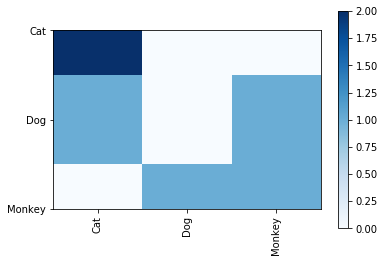

In [3]:
import matplotlib.pyplot as plt

columns = ['Cat', 'Dog', 'Monkey']
confusion = metrics.confusion_matrix(y_true, y_pred)

plt.imshow(confusion, cmap=plt.cm.Blues, interpolation='nearest')
plt.xticks([0,1,2], columns, rotation='vertical')
plt.yticks([0,1,2], columns)
plt.colorbar()

plt.show()

------------

<a id='scoring'></a>
## Scoring and Classification Metrics

There are some concepts that come into play when evaluating the machine learning models. <br>
They are different as we use classification models, regression, clustering and so on.<br>
Starting with classification models is important understand that when a model try to predict a label of a dataset it is possible to identify the prediction as:
- **True positive**: when the item is correctly labeled as belonging to the positive class;
- **True negative**: when the item is correctly labeled as belonging to the negative class;
- **False positive**: when item is incorrectly labeled as belonging to the positive class;
- **False negative**: when item isn't labeled as belonging to the positive class but should have been.

In a classification task:
- the **precision** (also called _**positive predictive value**_) _for a class is the number of true positives divided by the total number of elements labeled as belonging to the positive class_ (i.e. the sum of true positives and false positives).
- **Recall** (also called _**sensitivity**_) _is defined as the number of true positives divided by the total number of elements that actually belong to the positive class_ (i.e. the sum of true positives and false negatives).

<img src='resources/Precisionrecall.svg'> <br>

A *precision* score of 1.0 for a class C means that every item labeled as belonging to class C does indeed belong to class C (but says nothing about the number of items from class C that were not labeled correctly) whereas a *recall* of 1.0 means that every item from class C was labeled as belonging to class C (but says nothing about how many other items were incorrectly also labeled as belonging to class C).

The terms *positive* and *negative* refer to the classifier's prediction (sometimes known as the expectation), and the terms *true* and *false* refer to whether that prediction corresponds to the external judgment (sometimes known as the observation).

Considering the *confusion matrix* of the earlier paragraph's example, and focus on the cat class. We can build this *table of confusion*: <br>

![General Confusion Table](resources/Table.jpg)  

Generally we can consider our **confusion matrix** as follow
![General Confusion Matrix](resources/confusion_matrix.png)  
where:
1. The actual class = the previous label that we have in our dataset
2. Inducer Prediction = the prediction obtained from the algorithm

- TN = True Negative examples
- FP = False Positive examples
- FN = False Negative examples
- TP = True Positive examples

Whit this table we can perform some evaluation metrics:

- Accuracy
\begin{equation*}
Accuracy = \frac{TN + TP}{TN + FN + FP + TP}
\end{equation*}

With the accuracy we measure the difference between number of corrected prediction (principal diagonal of the matrix) with the total of evidences

- Error

\begin{equation*}
Error = \frac{FN + FP}{TN + FN + FP + TP}
\end{equation*}

With the error we measure the difference between number of wrong predictions (secondary diagonal) with the total of evidences

Remeber that the error can be also calculated as:

\begin{equation*}
Error = 1 - Accuracy
\end{equation*}

An estimate of accuracy in a classification model is not sufficient to be confident that the classification model developed provides a meaningful prediction when applied to new values not present in the trainingset.

Therefore, there is a risk of overfitting and underfitting the new data provided (without label when the algorithm for example is in production), so it is necessary to try to reduce this risk having new metrics to perform a better evaluation for this models

The classifications errors that can be committed are divided in two differents types:
1. Training Errors = the number of records of the training set that were not correctly classified
2. Generalization Errors = expected error in records that have not been previously seen (test set)

A good classification model should have:
- Low Training Error
- Low Generalization Error

So consider this example with a trainingset and a test set evaluated by two different models
- the transparent shapes (square and boxes) = are the trainingset
- the vivid color shapes = are the new data
- the blue line = is the first model
- the orange line = is the second model

![Generalalization Errors](resources/general_errors.png)  

- The orange model = have a low training error, but a high generalization error
- The blue model = have a high training error, but a low generalization error

#### Overfitting

- **low training error**
- **high generalization error**

i.e. the model performs very well on training data, but performs very badly on test data.

So the model is too complex and has too much flexibility on the trainingset, it generalizes so well that it creates wrong associations between the input and the class label on new data, but not on the trainingset.

#### Underfitting
- **high training error**
- **high generalization error**

the model is therefore not able to discriminate well both the test set and the training set.

This occurs when you have a classification model that is too simple, has low flexibility, and is not able to correctly link the input with the class label


### Recall and Precision

Recall and Precision are two metrics that are widely used in applications where the detection and interpretation of one class is considered more important than the other classes within the dataset.

\begin{equation*}
Precision (p) = \frac{TP}{TP + FP}
\end{equation*}

The Precision then determines: the fraction of records that are actually positive in the group that the classification model has declared as positive class.  
**The higher the accuracy, the fewer false positive errors the classification model has declared as positive.**


\begin{equation*}
Recall (r) = \frac{TP}{TP + FN}
\end{equation*}

Recall measures the fraction of positive records correctly predicted by the classification model.  
**Having a high recall means that very few positive records are wrongly classified as negative class.**  
In reality, Recall is equivalent to the True Positive Rate (TPR).


### F1 Measure

It is often possible to build Baseline models that maximize one metric, but not the other. (the two metrics are therefore dependent)

Precision and Recall are then usually added together in another measure called: F1 Measure which represents their harmonic average.

\begin{equation*}
F_{1} = \frac{2 * r * p}{r + p}
\end{equation*}

In particular a high F1 Measure value ensures that both the Precision and the Recall are reasonably high, and therefore that the model perforates well even on the smaller and less frequent classes within the model.

SciKit-Learn's metrics model helps you calculate many of these metrics automatically.  
https://scikit-learn.org/stable/modules/model_evaluation.html#classification-metrics

Given the following setup:

In [10]:
import sklearn.metrics as metrics

y_true = [1,1,1,2,2,2] # Actual, observed testing dataset values
y_pred = [1,1,2,2,2,2] # Predicted values from your model

In [11]:
metrics.confusion_matrix(y_true, y_pred)

array([[2, 1],
       [0, 3]])

In [14]:
print("Accuracy:", round(metrics.accuracy_score(y_true, y_pred),2))
print("Error:", round(1 - metrics.accuracy_score(y_true, y_pred),2))
print("Precision:", metrics.precision_score(y_true, y_pred))
print("Recall:", round(metrics.recall_score(y_true, y_pred),2))
print(f"F1 Score:" ,metrics.f1_score(y_true, y_pred))

Accuracy: 0.83
Error: 0.17
Precision: 1.0
Recall: 0.67
F1 Score: 0.8


So we have other metrics to consider for a model evaluations, and can be usefull in situations when we have a class imbalance problem where a label we want to predict it's very sparse and not homogeneus

**True Negative Rate** (TNR) also known as **Specificity**:  
Is a Fraction of negative records predicted correctly by the Classification Model

\begin{equation*}
TNR = \frac{TN}{TN + FP}
\end{equation*}

**False Negative Rate** (FNR):  
Is a fraction of positive records predicted as a negative class by the Classification Model

\begin{equation*}
FNR = \frac{FN}{TP + FN}
\end{equation*}

**True Positive Rate** (TPR) also known as **Recall** or sensitivity is a synonym for recall and is therefore defined as follows:  
Is a Fraction of positive records predicted correctly by the Classification Model

\begin{equation*}
TPR = \frac{TP}{TP + FN}
\end{equation*}



**False Positive Rate** (FPR) is defined as follows:  
Fraction of negative record predicted as a positive class by the Classification Model

\begin{equation*}
FPR = \frac{FP}{FP+FN}
\end{equation*}

Another metric computing for classification model is **ROC Curve** (_receveir operating characteristic curve_), that is a graph showing the performance at all classification thresholds.  
The curve plots 2 parameters:  
- True Positive Rate;
- False Positive Rate.

The following figure shows a typical ROC curve  

![ROC](resources/ROC.jpg)  

To compute the points in an ROC curve, we could evaluate a logistic regression model many times with different classification thresholds, but this would be inefficient. Fortunately, there's an efficient, sorting-based algorithm that can provide this information for us, called AUC.

- **AUC** stands for "Area under the ROC Curve." That is, AUC measures the entire two-dimensional area underneath the entire ROC curve (think integral calculus) from (0,0) to (1,1).

One way of interpreting AUC is as the probability that the model ranks a random positive example more highly than a random negative example.  
_AUC ranges in value from 0 to 1. A model whose predictions are 100% wrong has an AUC of 0.0; one whose predictions are 100% correct has an AUC of 1.0_.  

![AUC](resources/AUC.jpg)  

--------------

## Regression Metrics

Regression task is the prediction of the state of an outcome variable at a particular timepoint with the help of other correlated independent variables. The regression task, unlike the classification task, outputs continuous value within a given range.

The various metrics used to evaluate the results of the prediction are :
- Mean Squared Error(MSE)
- Root-Mean-Squared-Error(RMSE).
- Mean-Absolute-Error(MAE).
- R² or Coefficient of Determination.
- Adjusted R²

The sklearn.metrics module implements several loss, score, and utility functions to measure regression performance. Some of those have been enhanced to handle the multioutput case: mean_squared_error, mean_absolute_error, explained_variance_score and r2_score.

#### Explained Variance

https://www.wikiwand.com/en/Explained_variation  
https://scikit-learn.org/stable/modules/generated/sklearn.metrics.explained_variance_score.html#sklearn.metrics.explained_variance_score

If $\hat{y}$ is the estimated target output, $y$ the corresponding (correct) target output, and $Var$ the variance the square of the standard deviation, then the explained variance is estimated as follow:

\begin{equation*}
explained\_{}variance(y, \hat{y}) = 1 - \frac{Var\{ y - \hat{y}\}}{Var\{y\}}
\end{equation*}

The best possible score is 1.0, lower values are worse.

In [23]:
from sklearn.metrics import explained_variance_score
y_true = [3, -0.5, 2, 7]
y_pred = [2.5, 0.0, 2, 8]
print(explained_variance_score(y_true, y_pred))

y_true = [[0.5, 1], [-1, 1], [7, -6]]
y_pred = [[0, 2], [-1, 2], [8, -5]]
print(explained_variance_score(y_true, y_pred, multioutput=[0.3, 0.7]))

0.9571734475374732
0.9903225806451612


Critics about this measure:  

#### Max Errors

The max_error function computes the maximum residual error , a metric that captures the worst case error between the predicted value and the true value. 

In a perfectly fitted single output regression model, max_error would be 0 on the training set and though this would be highly unlikely in the real world, this metric shows the extent of error that the model had when it was fitted.

The residual errors are: https://www.wikiwand.com/en/Errors_and_residuals

\begin{equation*}
\text{Max Error}(y, \hat{y}) = max(| y_i - \hat{y}_i |)
\end{equation*}

In [28]:
from sklearn.metrics import max_error
y_true = [3, 2, 7, 1]
y_pred = [9, 2, 7, 1]
print(max_error(y_true, y_pred))

ImportError: cannot import name 'max_error'

#### Mean Squared Error

The mean_squared_error function computes mean square error, a risk metric corresponding to the expected value of the squared (quadratic) error or loss.

MSE or Mean Squared Error is one of the most preferred metrics for regression tasks.  
It is simply the average of the squared difference between the target value and the value predicted by the regression model.  
As it squares the differences, it penalizes even a small error which leads to over-estimation of how bad the model is.  
It is preferred more than other metrics because it is differentiable and hence can be optimized better.

https://www.wikiwand.com/en/Mean_squared_error

If $\hat{y}_i$ is the predicted value of the $i$-th sample, and $y_i$ is the corresponding true value, then the mean squared error (MSE) estimated over $n_{\text{samples}}$ is defined as


\begin{equation*}
\text{MSE}(y, \hat{y}) = \frac{1}{n_\text{samples}} \sum_{i=0}^{n_\text{samples} - 1} (y_i - \hat{y}_i)^2.
\end{equation*}

In [31]:
#Example of mean squared error
from sklearn.metrics import mean_squared_error
y_true = [3, -0.5, 2, 7]
y_pred = [2.5, 0.0, 2, 8]
print(mean_squared_error(y_true, y_pred))

y_true = [[0.5, 1], [-1, 1], [7, -6]]
y_pred = [[0, 2], [-1, 2], [8, -5]]
print(mean_squared_error(y_true, y_pred))

0.375
0.7083333333333334


#### Mean Absolute Error

The mean_absolute_error function computes mean absolute error, a risk metric corresponding to the expected value of the absolute error loss or $l1$-norm loss.

https://www.wikiwand.com/en/Mean_absolute_error

MAE is the absolute difference between the target value and the value predicted by the model.  
The MAE is more robust to outliers and does not penalize the errors as extremely as MSE (Mean Squared Error).  
MAE is a linear score which means all the individual differences are weighted equally.  
It is not suitable for applications where you want to pay more attention to the outliers.

If $\hat{y}_i$ is the predicted value of the $i$-th sample, and $y_i$ is the corresponding true value, then the mean absolute error (MAE) estimated over $n_{\text{samples}}$ is defined as

\begin{equation*}
\text{MAE}(y, \hat{y}) = \frac{1}{n_{\text{samples}}} \sum_{i=0}^{n_{\text{samples}}-1} \left| y_i - \hat{y}_i \right|.
\end{equation*}

In [26]:
from sklearn.metrics import mean_absolute_error
y_true = [3, -0.5, 2, 7]
y_pred = [2.5, 0.0, 2, 8]
print(mean_absolute_error(y_true, y_pred))

y_true = [[0.5, 1], [-1, 1], [7, -6]]
y_pred = [[0, 2], [-1, 2], [8, -5]]
print(mean_absolute_error(y_true, y_pred))

0.5
0.75


#### $Rˆ2$

Coefficient of Determination or R² is another metric used for evaluating the performance of a regression model.  
The metric helps us to compare our current model with a constant baseline and tells us how much our model is better.  

The constant baseline is chosen by taking the mean of the data and drawing a line at the mean. R² is a scale-free score that implies it doesn't matter whether the values are too large or too small, the R² will always be less than or equal to 1.

https://www.wikiwand.com/en/Coefficient_of_determination


It represents the proportion of variance (of y) that has been explained by the independent variables in the model.  
It provides an indication of goodness of fit and therefore a measure of how well unseen samples are likely to be predicted by the model, through the proportion of explained variance.

As such variance is dataset dependent, R² may not be meaningfully comparable across different datasets.  
Best possible score is 1.0 and it can be negative (because the model can be arbitrarily worse). A constant model that always predicts the expected value of y, disregarding the input features, would get a R² score of 0.0.

**Warning**: is influenced to the type of data and scale you are using, so make sure you make the correct transformations to your label (or y) if you want to have correct and interpretable values.

If $\hat{y}_i$ is the predicted value of the $i$-th sample and $y_i$ is the corresponding true value for total $n$ samples, the estimated R² is defined as:

\begin{equation*}
R^2(y, \hat{y}) = 1 - \frac{\sum_{i=1}^{n} (y_i - \hat{y}_i)^2}{\sum_{i=1}^{n} (y_i - \bar{y})^2}
\end{equation*}

Where $\bar{y} = \frac{1}{n} \sum_{i=1}^{n} y_i$ and $\sum_{i=1}^{n} (y_i - \hat{y}_i)^2 = \sum_{i=1}^{n} \epsilon_i^2$

Warning: Note that r2_score in sklearn calculates unadjusted R² without correcting for bias in sample variance of y.

In [34]:
#R2 Example
from sklearn.metrics import r2_score

y_true = [3, -0.5, 2, 7]
y_pred = [2.5, 0.0, 2, 8]
print(f"Normal R2 Score: {r2_score(y_true, y_pred)}")

y_true = [[0.5, 1], [-1, 1], [7, -6]]
y_pred = [[0, 2], [-1, 2], [8, -5]]
print(f"With Variance weighted: {r2_score(y_true, y_pred, multioutput='variance_weighted')}")

y_true = [[0.5, 1], [-1, 1], [7, -6]]
y_pred = [[0, 2], [-1, 2], [8, -5]]
print(f"with uniform Average: {r2_score(y_true, y_pred, multioutput='uniform_average')}")

y_true = [[1,6],[3,5],[7,2]]
y_pred = [[0.9,5.8],[3.02,5.06], [6.8,1.6]]
print(f"Normal R2 Score: {r2_score(y_true, y_pred)}")

Normal R2 Score: 0.9486081370449679
With Variance weighted: 0.9382566585956417
with uniform Average: 0.9368005266622779
Normal R2 Score: 0.9869038461538462


**Why R2 can be negative??**

There is a misconception among people that R² score ranges from 0 to 1 but actually it ranges from -∞ to 1.  
Due to this misconception, they are sometimes scared why the R² is negative which is not a possibility according to them.

The main reasons for R² to be negative are the following:

1. **The chosen model does not follow the trend of the data** causing the R² to be negative. This causes the mse of the chosen model(numerator) to be more than the mse for constant baseline(denominator) resulting in negative R².

![R2 Negative](resources/r2_negative.png)

2. Maybe their area a **large number of outliers** in the data that causes the mse of the model to be more than mse of the baseline causing the R² to be negative(i.e the numerator is greater than the denominator).

----------------

## Clustering Metrics

https://scikit-learn.org/stable/modules/clustering.html#clustering-performance-evaluation  
https://towardsdatascience.com/k-means-clustering-algorithm-applications-evaluation-methods-and-drawbacks-aa03e644b48a  

<a id='clustersnumber'></a>
# Determining optimal number of clusters
Determining the optimal number of clusters in a data set is a fundamental issue in partitioning clustering, such as k-means clustering, which requires the user to specify the number of clusters k to be generated.  

Unfortunately, there is no definitive answer to this question. The optimal number of clusters is somehow subjective and depends on the method used for measuring similarities and the parameters used for partitioning.
A simple and popular solution consists of inspecting the dendrogram produced using hierarchical clustering to see if it suggests a particular number of clusters. Unfortunately, this approach is also subjective.  

These methods include direct methods and statistical testing methods:

-  Direct methods: consists of optimizing a criterion, such as the within cluster sums of squares or the average silhouette. The corresponding methods are named elbow and silhouette methods, respectively.  

- Statistical testing methods: consists of comparing evidence against null hypothesis. An example is the gap statistic.

#### Elbow Method

Recall that, the basic idea behind partitioning methods, such as k-means clustering, is to define clusters such that the total intra-cluster variation [or total within-cluster sum of square (WSS)] is minimized. The total WSS measures the compactness of the clustering and we want it to be as small as possible.

The Elbow method looks at the total WSS as a function of the number of clusters: One should choose a number of clusters so that adding another cluster doesn’t improve much better the total WSS.

The optimal number of clusters can be defined as follow:

1. Compute clustering algorithm (e.g., k-means clustering) for different values of k. For instance, by varying k from 1 to 10 clusters.
2. For each k, calculate the total within-cluster sum of square (wss).
3. Plot the curve of wss according to the number of clusters k.
4. The location of a bend (knee) in the plot is generally considered as an indicator of the appropriate number of clusters.

In [57]:
#Import libraries for silhouette and elbow
import chart_studio.plotly as py
import plotly.graph_objs as go
from plotly import tools

from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.mixture import GaussianMixture as GMM

from matplotlib.patches import Ellipse

import matplotlib
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

from random import seed

import math
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib

from sklearn import preprocessing


In [58]:
#Import the dataset
df = pd.read_csv('resources/CrimesDataset.csv', header = 0)
df_1 = df.copy()

# We'll drop any rows that have nans in them
df = df.dropna(axis=0)
df_1 = df_1.dropna(axis=0)

# Coerce the Date feature (which is currently a string object) into real date

df.Date = pd.to_datetime(df.Date, errors='coerce')
df['Updated On'] = pd.to_datetime(df['Updated On'], errors='coerce')
df_1.Date = pd.to_datetime(df_1.Date, errors='coerce')
df_1['Updated On'] = pd.to_datetime(df_1['Updated On'], errors='coerce')




In [84]:
#Define the range of the clusters
range_n_clusters = range(1,7)
print("range of clusters to evaluate: ", range_n_clusters)

#Define the dataset for the silhouette
X = df.loc[:, ['Longitude', 'Latitude']]

#Define a result output
wcss=[]

#Need to set a seed for reproducibility
seed(42)


range of clusters to evaluate:  range(1, 7)


In [85]:
def kmeansElbow(X,range_n_clusters):
# Create all possible cluster solutions with a loop

    for n_clusters in range_n_clusters:

        # Cluster solution with i clusters
        kmeans = KMeans(n_clusters= n_clusters)
        # Fit the data
        kmeans.fit(X)
        # Find WCSS for the current iteration (inertia measure)
        wcss_iter = kmeans.inertia_
        # Append the value to the WCSS list
        wcss.append(wcss_iter)

    
    return wcss

Text(0, 0.5, 'Within-cluster Sum of Squares')

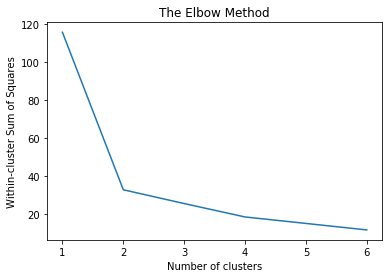

In [86]:
wcss = kmeansElbow(X, range_n_clusters)


number_clusters = range(1,7)
plt.plot(number_clusters,wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Within-cluster Sum of Squares')

Il numero ottimale di cluster si trova nel punto in cui la linea di questo grafico effettua la deviazione più significativa. Come è possibile vedere questo valore, nel caso mostrato, si ha in corrispondenza di 2 cluster e quindi 2 è il numero ideale di cluster da creare.  
Notiamo come avere un numero di cluster pari a 4 potrebbe comunque essere significativo.  
Il numero corretto di cluster è sempre soggetto a interpretazione.

#### Silhouette Method

The average silhouette approach we’ll be described comprehensively in the chapter cluster validation statistics. Briefly, it measures the quality of a clustering. That is, it determines how well each object lies within its cluster. A high average silhouette width indicates a good clustering.

Average silhouette method computes the average silhouette of observations for different values of k. The optimal number of clusters k is the one that maximize the average silhouette over a range of possible values for k (Kaufman and Rousseeuw 1990).

The algorithm is similar to the elbow method and can be computed as follow:  
1. Compute clustering algorithm (e.g., k-means clustering) for different values of k. For instance, by varying k from 1 to 10 clusters.
2. For each k, calculate the average silhouette of observations (avg.sil).
3. Plot the curve of avg.sil according to the number of clusters k.
4. The location of the maximum is considered as the appropriate number of clusters.

#### Silhouette Score  

This score, as clearly stated by the SKLearn developers, consider two measures:

1. The mean distance between a sample and all other points in the same cluster.
2. The mean distance between a sample and all other points in the next nearest cluster.  

The coefficient can take values in the interval [-1, 1].
- If it is 0 –> the sample is very close to the neighboring clusters.
- It it is 1 –> the sample is far away from the neighboring clusters.
- It it is -1 –> the sample is assigned to the wrong clusters.

Therefore, we want the coefficients to be as big as possible and close to 1 to have a good clusters.

i.e. it checks how much the clusters are compact and well separated. The more the score is near to one, the better the clustering is.

In [87]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [88]:
#Define the range of the clusters
range_clusters = enumerate([2, 3, 4, 5, 6])
print("range of clusters to evaluate: ", range_n_clusters)

#Define the dataset for the silhouette
X = df.loc[:, ['Longitude', 'Latitude']]

#Define a result output
tmp_sil=[]

sils = []
sils_err = []

#Need to set a seed for reproducibility
seed(42)

range of clusters to evaluate:  range(1, 7)


In [89]:
def kmeansSilhouette(X,range_clusters):
    for i, k in range_clusters :

        fig, (ax1, ax2) = plt.subplots(1, 2)
        fig.set_size_inches(18, 7)

        # Run the Kmeans algorithm
        km = KMeans(n_clusters=k)

        km_fit = km.fit(X)
        labels = km.predict(X)

        centroids = km.cluster_centers_


        # Get silhouette samples
        silhouette_vals = silhouette_samples(X, labels)

        # Silhouette plot
        y_ticks = []
        y_lower, y_upper = 0, 0

        for i, cluster in enumerate(np.unique(labels)):

            cluster_silhouette_vals = silhouette_vals[labels == cluster]
            cluster_silhouette_vals.sort()

            y_upper += len(cluster_silhouette_vals)
            ax1.barh(range(y_lower, y_upper), cluster_silhouette_vals, edgecolor='none', height=1)
            ax1.text(-0.03, (y_lower + y_upper) / 2, str(i + 1))
            y_lower += len(cluster_silhouette_vals)


        print("For n_clusters =", k,
                  "The average silhouette_score is :", np.mean(silhouette_vals))    


        # Get the average silhouette score and plot it
        avg_score = np.mean(silhouette_vals)
        ax1.axvline(avg_score, linestyle='--', linewidth=2, color='green')
        ax1.set_yticks([])
        ax1.set_xlim([-0.1, 1])
        ax1.set_xlabel('Silhouette coefficient values')
        ax1.set_ylabel('Cluster labels')
        ax1.set_title('Silhouette plot for the various clusters', y=1.02);


        # Scatter plot of data colored with labels
        #ax2.scatter(X.iloc[:, 0], X.iloc[:, 1], c=labels)

        ax2.scatter(X.iloc[:,0], X.iloc[:,1], marker='.', alpha=0.3) #print data
        ax2.scatter(centroids[:, 0], centroids[:, 1], marker='*', c='r', s=250) #print centroids
        #ax2.scatter(centroids[:,0], centroids[:,1], marker='x', c='red', alpha=0.5, linewidths=3, s=169)
        ax2.set_xlabel('Latitude')
        ax2.set_ylabel('Longitude')
        ax2.set_title('Visualization of clustered data', y=1.02)
        plt.suptitle(f'Silhouette analysis using k = {k}',
                     fontsize=16, fontweight='semibold', y=1.05);

For n_clusters = 2 The average silhouette_score is : 0.6324824583177656
For n_clusters = 3 The average silhouette_score is : 0.5065371242060075
For n_clusters = 4 The average silhouette_score is : 0.503387504770983
For n_clusters = 5 The average silhouette_score is : 0.51620290042035
For n_clusters = 6 The average silhouette_score is : 0.45129697015766235


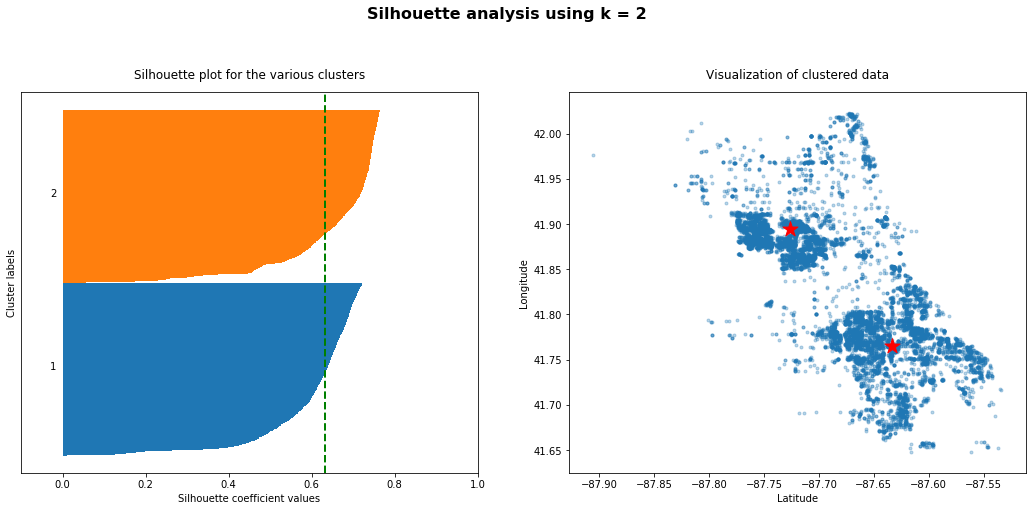

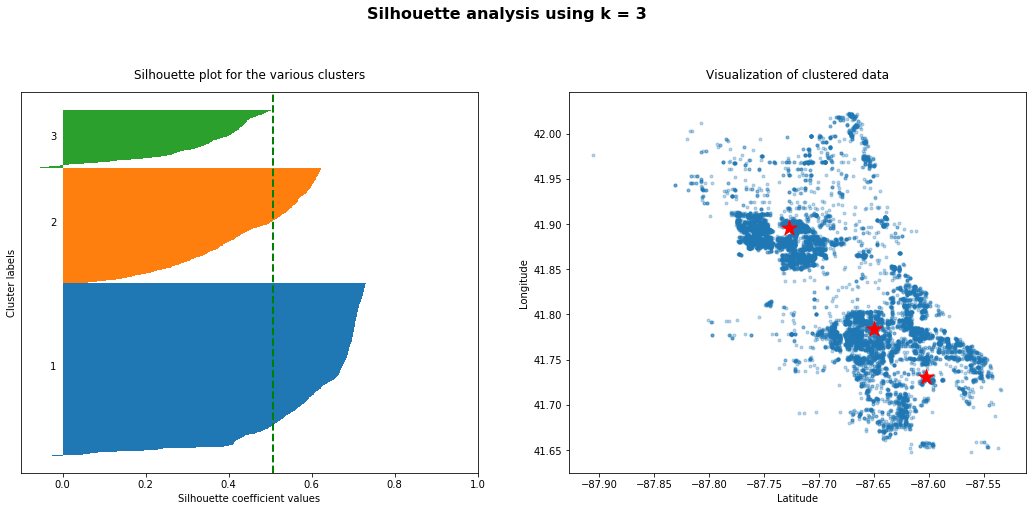

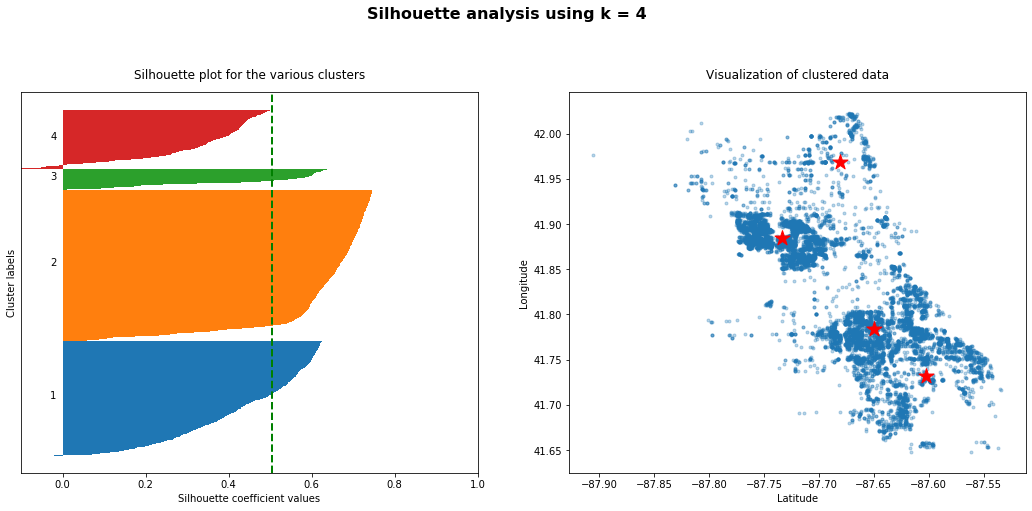

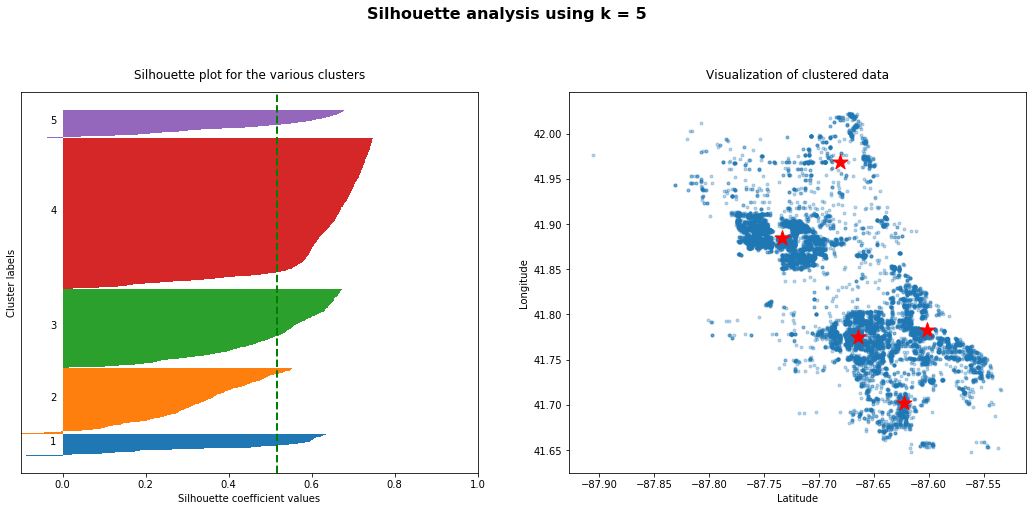

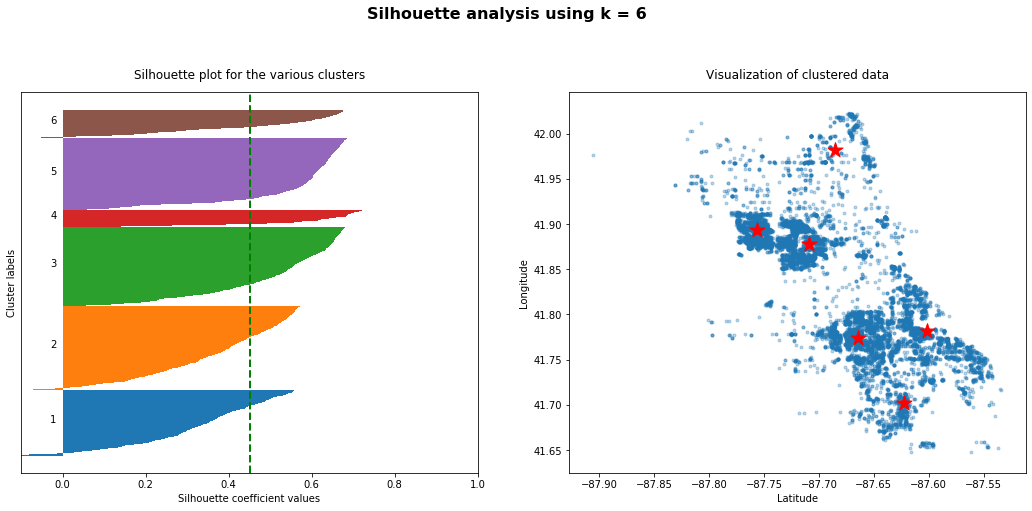

In [90]:
kmeansSilhouette(X,range_clusters)

The green line show the **best average silhouette score**

Below are the main takeaways of Kmeans, Elbow and Silhouette:  

- Scale/standardize the data when applying kmeans algorithm.  
- Elbow method in selecting number of clusters doesn’t usually work because the error function is monotonically decreasing for all ks.  
- Kmeans gives more weight to the bigger clusters.  
- Kmeans assumes spherical shapes of clusters (with radius equal to the distance between the centroid and the furthest data point) and doesn’t work well when clusters are in different shapes such as elliptical clusters.  
- If there is overlapping between clusters, kmeans doesn’t have an intrinsic measure for uncertainty for the examples belong to the overlapping region in order to determine for which cluster to assign each data point.  
- Kmeans may still cluster the data even if it can’t be clustered such as data that comes from uniform distributions.  

---------------

## Subset, Evaluation and Interpretability

A classification model may or may not be robust:
- Outliers
- Missing date
- Variations to the trainingset or test set

A classifier will be **scalable** if it is able to learn from a large amount of data, this property is also intrinsically related to learning speed.

When Machine Learning is geared towards the **interpretability** of results and the problem to be solved, not just ensuring good accuracy values, it is important that the rules extracted are simple and clear and can be easily understood by the data domain expert.

### Holdout Method

The dataset D is partitioned into separate subsets.
Using a simple random sampling.

A Best Practise suggests partitioning the subsets into 2/3 for the trainingset and 1/3 for the test set (70-30 rule).

![Holdout Method](resources/holdout.png)

In sklearn it's very easy using the holdout method

In [43]:
import numpy as np
from sklearn.model_selection import train_test_split

X, y = np.arange(20).reshape((10, 2)), range(10)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(f"X Train Shape: {len(X_train)}")
print(f"X Test Shape: {len(X_test)}")
print(f"Y Train: {len(y_train)}")
print(f"Y Test: {len(y_test)}")

#It's possible also to shuffle the data
train_test_split(y, shuffle=False)

X Train Shape: 8
X Test Shape: 2
Y Train: 8
Y Test: 2


[[0, 1, 2, 3, 4, 5, 6], [7, 8, 9]]

The estimated accuracy, however, depends on the choice of the test set, you can over or under estimate the true value of the grading accuracy.  
More robust validation methods can be obtained through: iterated holdout or through cross validation

**Iterated Holdout**

It consists in making R iterations using the Holdout method  
Iterated Holdout performa better than Holdout, being also more bearded to any Bias present in the dataset.

Be careful though, because:
	- Iterated Holdout does not allow you to check the number of times a given record is contained in the training and test set.
	- There can be very strong bias with reference to cases where the dataset contains records that are dominant.

In these cases it is necessary to use more effective methods of evaluation, to reduce and monitor the impact of outliers compared to the performance estimate of the classifier.

The test Dataset will then be obtained as follows:
$D_{TS_{r}} = D - D_{T}$


### Cross Validation

We're already well aware of the importance of splitting our data into training and testing sets to validate the accuracy of our models by checking how well it fits the data. This method of avoiding overfitting introduces three issues:
- Each time we run train/test split, unless we set the random_state parameter, we're going to get back different accuracy scores; 
- The second issue introduced is by withholding data from training, we essentially lose some of our training data. Machine learning is only as accurate as the data its trained upon, so generally more data means better results. Neglecting to train our models on our hard collected data is like refusing to take our rightful change at the bank;
- But the most important issue introduced is that with some of the more configurable estimators, such as SVC, we will probably end up running our model many times while tinkering with the various parameters, such as C and gamma for producing optimal results. By doing this, we will leak some information from our testing set into our training set. Our model, armed with these secret details about our testing set, might still perform poorly in the real-world if it overfit that data.

The way to overcome this is by using **cross_val_score()** method. <br>
This method takes as input our model along with our training dataset and performs K-fold cross validations on it. <br>
In other words, our training data is first cut into a number of 'K' sets. Then, "K" versions of our model are trained, each using an independent K-1 number of the "K" available sets. Each model is evaluated with the last set, it's **out-of-bag set**. <br>

Ensures that each D dataset record is included in the training set the same number of times and exactly once in the test set.

Dataset D is then partitioned into separate and exhaustive K sub sets (D partition) with at least a constant number of records: $D_1, D_2, ..., Dk$

So let's do a learning-testing K iteration. The k-th iteration will have:
$D_{T_k} = {D_1, ..., D_{k-1}, D_{k+1},..., D_k}$ with $D_{TS_k} = D_k$

The set $D_{t_k}$ is used for training while its complement set $D_k$ is used for testing at the $k-th$ iteration.

This is called: k-fold cross validation!

![Cross Validation](resources/cross_val.png)

In Sklearn can be implemented as:

In [44]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import datasets
from sklearn import svm

X, y = datasets.load_iris(return_X_y=True)
X.shape, y.shape

((150, 4), (150,))

The simplest way to use cross-validation is to call the cross_val_score helper function on the estimator and the dataset.

In [45]:
from sklearn.model_selection import cross_val_score

clf = svm.SVC(kernel='linear', C=1)
scores = cross_val_score(clf, X, y, cv=5)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Accuracy: 0.98 (+/- 0.03)


By default, the score computed at each CV iteration is the score method of the estimator. It is possible to change this by using the scoring parameter:

In [49]:
from sklearn import metrics
scores = cross_val_score(clf, X, y, cv=5, scoring='f1_macro')
print(f'F1 Macro Score: {scores.mean()}')

F1 Macro Score: 0.9799498746867169


There are a lot of possible scoring metrics:

In [51]:
#Visualize all possibile metrics for cross validation
from sklearn import metrics as m
m.SCORERS.keys()

dict_keys(['explained_variance', 'r2', 'neg_median_absolute_error', 'neg_mean_absolute_error', 'neg_mean_squared_error', 'neg_mean_squared_log_error', 'accuracy', 'roc_auc', 'balanced_accuracy', 'average_precision', 'neg_log_loss', 'brier_score_loss', 'adjusted_rand_score', 'homogeneity_score', 'completeness_score', 'v_measure_score', 'mutual_info_score', 'adjusted_mutual_info_score', 'normalized_mutual_info_score', 'fowlkes_mallows_score', 'precision', 'precision_macro', 'precision_micro', 'precision_samples', 'precision_weighted', 'recall', 'recall_macro', 'recall_micro', 'recall_samples', 'recall_weighted', 'f1', 'f1_macro', 'f1_micro', 'f1_samples', 'f1_weighted'])

The cross_validate function differs from cross_val_score in two ways:

It allows specifying multiple metrics for evaluation.

It returns a dict containing fit-times, score-times (and optionally training scores as well as fitted estimators) in addition to the test score.

In [56]:
from sklearn.model_selection import cross_validate
from sklearn.metrics import recall_score

scoring = ['precision_macro', 'recall_macro']

clf = svm.SVC(kernel='linear', C=1, random_state=0)
scores = cross_validate(clf, X, y, scoring=scoring, cv=5)
print(sorted(scores.keys()))

scores['test_recall_macro']

['fit_time', 'score_time', 'test_precision_macro', 'test_recall_macro', 'train_precision_macro', 'train_recall_macro']


array([0.96666667, 1.        , 0.96666667, 0.96666667, 1.        ])

We can also obtain predictions using the cross validation:

The function **cross_val_predict** has a similar interface to **cross_val_score**, but returns, for each element in the input, the prediction that was obtained for that element when it was in the test set.  
Only cross-validation strategies that assign all elements to a test set exactly once can be used (otherwise, an exception is raised).

The function cross_val_predict is appropriate for:  
- Visualization of predictions obtained from different models.
- Model blending: When predictions of one supervised estimator are used to train another estimator in ensemble methods.

Cross validation allows us to use all the data we provide as both training and testing. <br>
Many resources online will recommend us don't even do the extra step of splitting our data into a training and testing set and just feed the lot directly into our cross validator. There are advantages and disadvantages of this:
- The main advantage is the overall simplicity of your process;
- The disadvantage is that it still is possible for some information to leak into your training dataset, as we discussed above with the SVC example. This information leak might even occur prior to us fitting our model, for example it might be at the point of transforming our data using isomap or principle component analysis.

In the wild, the best process to use depending on how many samples we have at our disposal and the machine learning algorithms we are using, is either of the following: <br>
1) Split our data into training, validation, and testing sets; <br>
2) Setup a pipeline, and fit it with our **training** set; <br>
3) Access the accuracy of its output using our **validation** set; <br>
4) Fine tune this accuracy by adjusting the hyper-parameters of our pipeline; <br>
5) When we are comfortable with its accuracy, finally evaluate our pipeline with the **testing** set. <br>
<br>
OR <br>
<br>
1) Split our data into training and testing sets; <br>
2) Setup a pipeline with CV and fit/score it with our **training** set; <br>
3) Fine tune this accuracy by adjusting the hyper-parameters of our pipeline; <br>
4) When we are comfortable with its accuracy, finally evaluate our pipeline with the **testing** set. <br>
<br>
<br>
Useful link:
- [Cross-Validation iterators](https://scikit-learn.org/stable/modules/cross_validation.html#cross-validation-iterators)

----------------------

<a id='power_tuning'></a>
## Power Tuning


The method used for parameter tuning is **GridSearchCV**. <br>
In its simplest form, GridSearchCV works by taking in an estimator, a grid of parameters you want optimized, and your cv split value. This is the example from [SciKit-Learn's API page](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html):

In [17]:
from sklearn import svm, datasets
from sklearn.model_selection import GridSearchCV

iris = datasets.load_iris()
parameters = {'kernel':('linear', 'rbf'), 'C':[1, 5, 10]}
svc = svm.SVC(gamma="scale")
clf = GridSearchCV(svc, parameters, cv=3)
clf.fit(iris.data, iris.target)

/Users/jeydi/opt/anaconda3/envs/develop/lib/python3.6/site-packages/sklearn/model_selection/_search.py:842: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=3, error_score='raise-deprecating',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'kernel': ('linear', 'rbf'), 'C': [1, 5, 10]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In this example, GridSearchCV is being used to optimize a support vector classifier model.

Since the exact parameters have been specified, GridSearchCV will build a table of every combination (but not permutation) of the available parameters and crossvalidate each one separately:  

![Power Tuning](resources/power_tuning.jpg)  



In addition to explicitly defining the parameters you want tested, you can also use randomized parameter optimization with SciKit-Learn's class
https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.RandomizedSearchCV.html

The semantics are a bit different here.  
First, instead of passing a list of grid objects (with GridSearchCV, you can actually perform multiple grid optimizations, consecutively), this time you pass in a your parameters as a single dictionary that holds either possible, discrete parameter values or distribution over them.

RandomizedSearchCV also takes in an optional n_iter parameter you can use to control the number of parameter settings that are sampled. Regardless of the cross validation search tool you end up using, after all of the methods exposed by the class are ran using the estimator that maximized the score of the out-of-bag data. So in the examples above, the .fit() method along with any subsequent methods, such as .predict(), .score(), .transform(), .predict() are all executed and return values as-if they were called on the best found estimator directly.<br>
SciKit-Learn has [a very nice example](https://scikit-learn.org/stable/auto_examples/model_selection/plot_randomized_search.html#sphx-glr-auto-examples-model-selection-plot-randomized-search-py) that compares the execution times as well as scoring results of randomized search versus grid search, while trying to optimize various random forest
parameters.

Another way to search parameters is the **classic brute force**: Try unitl you didn't find your best configuration

--------

<a id='pipeling'></a>
## Pipeling

SciKit-Learn has created a pipelining class, it wraps around your entire data analysis pipeline from start to finish, and allows you to interact with the pipeline as if it were a single white-box, configurable estimator.

The other added benefit is that once your pipeline has been built, since the pipeline inherits from the estimator base class, you can use it pretty much anywhere you'd use regular estimators-including in your cross validator method. Doing so, you can simultaneously fine tune the parameters of each of the estimators and predictors that comprise your data-analysis pipeline.

If you don't want to encounter errors, there are a few rules you must abide by while using SciKit-Learn's pipeline:
- Every intermediary model, or step within the pipeline must be a transformer. That means its class must implement both the .fit() and the .transform() methods. This is rather important, as the output from each step will serve as the input to the subsequent step;
- The very last step in your analysis pipeline only needs to implement the .fit() method, since it will not be feeding data into another step.

The code to get up and running with your own pipelines looks like this:

In [ ]:
from sklearn.pipeline import Pipeline

svc = svm.SVC(kernel='linear')
pca = RandomizedPCA()
pipeline = Pipeline([('pca', pca), ('svc', svc)])
pipeline.set_params(pca__n_components=5, svc__C=1, svc__gamma=0.0001)
pipeline.fit(X, y)

Notice that when you define parameters, you have to lead with the name you specified for that parameter when you added it to your pipeline, followed by two underscores and the parameter name. This is important because there are many estimators that share the same parameter names within SciKit-Learn's API. Without this, there would be ambiguity. <br>
The pipeline class only has a single attribute called .named_steps, which is a dictionary containing the estimator names you specified as keys. <br>
You can use it to gain access to the underlying estimator steps within your pipeline. Besides directly specifying estimators, you can also have feature unions and nested pipelines as well! On top of that, you can implement your own custom transformers as a minimal class, so long as you provide end-points for .fit(), and .transform().

#### **Some useful links:**
- [Emanuel Ferm - Cheat Sheet](http://eferm.com/machine-learning-cheat-sheet/)
- [Estimator Parameter Search-Space](https://scikit-learn.org/stable/modules/grid_search.html#grid-search)
- [Getting Crazy With Pipelining](http://zacstewart.com/2014/08/05/pipelines-of-featureunions-of-pipelines.html)
- [Overfitting](https://en.wikipedia.org/wiki/Overfitting)

With this paragraph ends the notebook "Evaluating" and the Python Course.


- [Click here to return to the top of the pag](#inizio)<a href='#inizio'></a>